In [4]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [5]:
df.head(), df.shape, df.info()
df["Outcome"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count
Outcome,
0,500
1,268


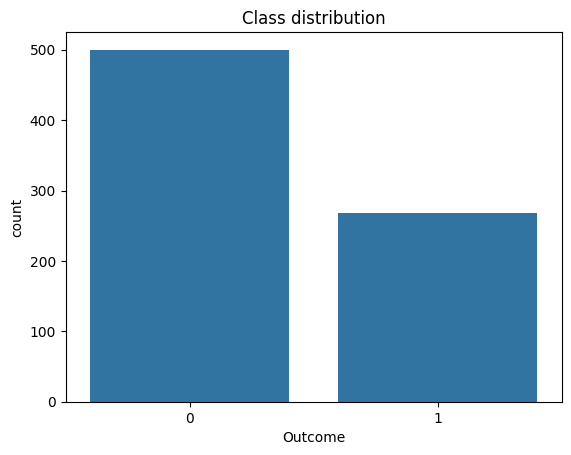

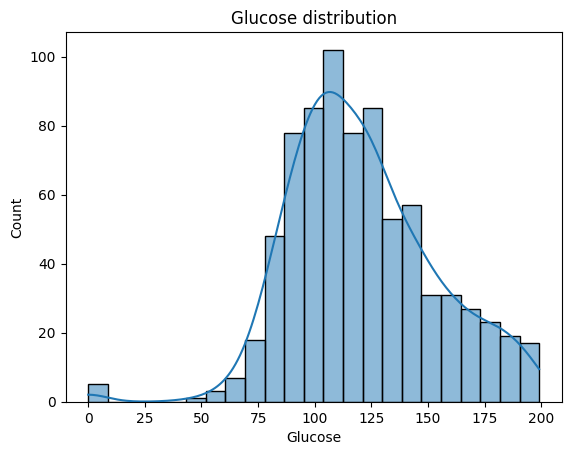

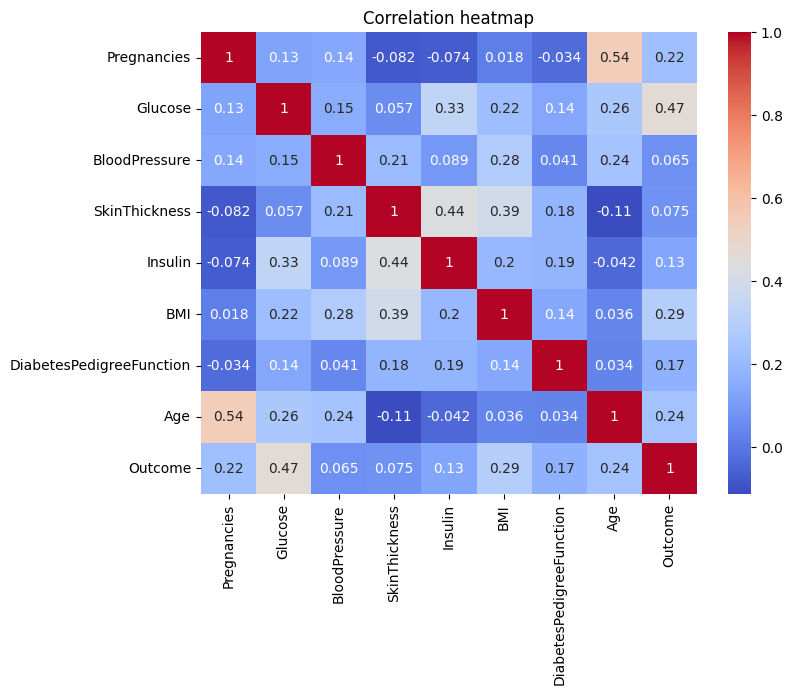

In [6]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Outcome", data=df)
plt.title('Class distribution'); plt.show()
sns.histplot(df['Glucose'], kde=True); plt.title('Glucose distribution'); plt.show()

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap'); plt.show()



In [7]:
#handling missing or invalid values
import numpy as np
from sklearn.impute import SimpleImputer
df_clean = df.copy()
cols_with_zero_missing = ['Glucose', "BloodPressure","SkinThickness", "Insulin","BMI"]
for col in cols_with_zero_missing:
  df_clean[col] = df_clean[col].replace(0, np.nan)


In [8]:
X = df_clean.drop('Outcome', axis=1)
y = df_clean["Outcome"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
scaler = StandardScaler()
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



In [12]:
#random forest algo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train_imp, y_train)
y_pred_rf = rf.predict(X_test_imp)g

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

